In [57]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [6]:
df = pd.read_csv(r"C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\heartstroke dataset after data analytics.csv", index_col=0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0,1,1,2,1,0.934478,0.632212,1,1
1,0.708205,0,0.743652,0,0,1,3,0,0.791913,0.427885,2,1
2,0.426015,1,0.975586,0,1,1,2,0,0.273501,0.533654,2,1
3,0.824928,0,0.597168,0,0,1,2,1,0.625121,0.579327,3,1
4,0.021929,0,0.963379,1,0,1,3,0,0.640681,0.329327,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,0,0.975586,1,0,1,2,1,0.154140,0.427885,2,0
5106,0.614850,0,0.987793,0,0,1,3,1,0.377302,0.713942,2,0
5107,0.269730,0,0.426270,0,0,1,3,0,0.150048,0.487981,2,0
5108,0.514278,1,0.621582,0,0,1,2,0,0.598525,0.367788,1,0


In [19]:
X = df.values[:, : len(df.columns)-1]
Y = df.values[:,-1]

In [20]:
X

array([[0.12321436, 1.        , 0.81689453, ..., 0.9344783 , 0.63221154,
        1.        ],
       [0.70820468, 0.        , 0.74365234, ..., 0.79191343, 0.42788462,
        2.        ],
       [0.42601512, 1.        , 0.97558594, ..., 0.27350059, 0.53365385,
        2.        ],
       ...,
       [0.26972953, 0.        , 0.42626953, ..., 0.15004845, 0.48798077,
        2.        ],
       [0.51427826, 1.        , 0.62158203, ..., 0.59852482, 0.36778846,
        1.        ],
       [0.61218833, 0.        , 0.53613281, ..., 0.16237752, 0.38221154,
        0.        ]])

In [21]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

# Feature Selection
First, checking the correlation of dependent aattribute i.e stroke with other attributes

In [8]:
df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.001908,0.003283,0.004181,-0.002742,0.012823,-0.018964,-0.005296,-0.000047,0.016431,0.011947,0.003235
gender,0.001908,1.000000,-0.029320,0.016912,0.083991,-0.031748,0.055538,-0.004891,0.055000,-0.020868,-0.063247,0.003252
age,0.003283,-0.029320,1.000000,0.277528,0.262957,0.681191,-0.365718,0.014636,0.218924,0.357836,0.265766,0.243827
hypertension,0.004181,0.016912,0.277528,1.000000,0.104100,0.164592,-0.050360,0.000900,0.160597,0.141079,0.110468,0.120867
heart_disease,-0.002742,0.083991,0.262957,0.104100,1.000000,0.113398,-0.031049,0.003243,0.158241,0.050398,0.047482,0.126521
ever_married,0.012823,-0.031748,0.681191,0.164592,0.113398,1.000000,-0.356154,0.005270,0.141621,0.358633,0.261606,0.106695
work_type,-0.018964,0.055538,-0.365718,-0.050360,-0.031049,-0.356154,1.000000,-0.008999,-0.046228,-0.321202,-0.311756,-0.032080
Residence_type,-0.005296,-0.004891,0.014636,0.000900,0.003243,0.005270,-0.008999,1.000000,-0.004005,0.006226,0.008303,0.017887
avg_glucose_level,-0.000047,0.055000,0.218924,0.160597,0.158241,0.141621,-0.046228,-0.004005,1.000000,0.169778,0.052818,0.120517
bmi,0.016431,-0.020868,0.357836,0.141079,0.050398,0.358633,-0.321202,0.006226,0.169778,1.000000,0.241367,0.041678


# Feature Selection using Information gain

<AxesSubplot:>

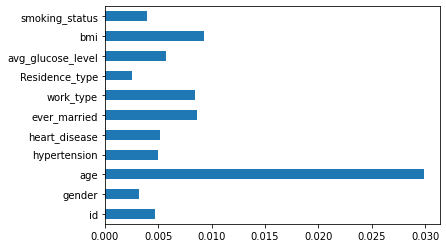

In [23]:
importances = mutual_info_classif(X,Y)
featureImp = pd.Series(importances, df.columns[0:len(df.columns)-1])
featureImp.plot(kind="barh")

In [28]:
independent_feature_cols = ['gender', 'age', 'heart_disease','work_type','avg_glucose_level','bmi']
X = df[independent_feature_cols]
X = X.values[:,:]
X

array([[1.        , 0.81689453, 1.        , 2.        , 0.9344783 ,
        0.63221154],
       [0.        , 0.74365234, 0.        , 3.        , 0.79191343,
        0.42788462],
       [1.        , 0.97558594, 1.        , 2.        , 0.27350059,
        0.53365385],
       ...,
       [0.        , 0.42626953, 0.        , 3.        , 0.15004845,
        0.48798077],
       [1.        , 0.62158203, 0.        , 2.        , 0.59852482,
        0.36778846],
       [0.        , 0.53613281, 0.        , 0.        , 0.16237752,
        0.38221154]])

In [29]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

# Spliting the dataset into train, test and validation set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.15, random_state = 100)

# Building the model 

In [53]:
entropy_classifier = DecisionTreeClassifier(criterion = "entropy")
  
# Performing training
entropy_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
y_pred = entropy_classifier.predict(X_test)
print("Predicted values:")
y_pred


Predicted values:


array([0., 0., 0., ..., 0., 0., 0.])

# Evaluation of the model

Confusion Matrix: 


<AxesSubplot:>

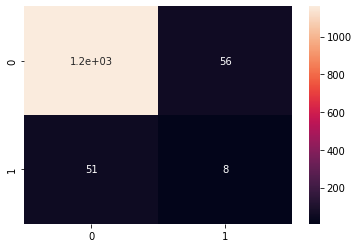

In [55]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
sns.heatmap(confusionMatrix, annot=True)


In [56]:
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Accuracy :  91.6078431372549
Report :                precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1216
         1.0       0.12      0.14      0.13        59

    accuracy                           0.92      1275
   macro avg       0.54      0.54      0.54      1275
weighted avg       0.92      0.92      0.92      1275



# Pickle Model

In [59]:
with open('decision_tree_model', 'wb') as files:
    pickle.dump(entropy_classifier, files)

In [60]:
with open('decision_tree_model' , 'rb') as modelFile:
    decisionTree = pickle.load(modelFile)

# Predicting the values of the validation set with the pickle model

In [61]:
valid_pred = decisionTree.predict(X_val)
print("Predicted values:")
valid_pred


Predicted values:


array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Confusion Matrix: 


<AxesSubplot:>

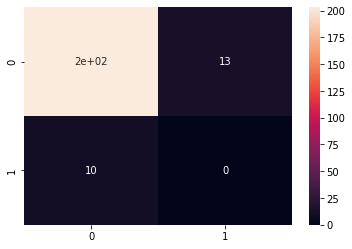

In [62]:
confusionMatrix = confusion_matrix(y_val, valid_pred)
print("Confusion Matrix: ")
sns.heatmap(confusionMatrix, annot=True)

In [63]:
print ("Accuracy : ",accuracy_score(y_val,valid_pred)*100)

print("Report : ", classification_report(y_val, valid_pred))

Accuracy :  89.82300884955751
Report :                precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       216
         1.0       0.00      0.00      0.00        10

    accuracy                           0.90       226
   macro avg       0.48      0.47      0.47       226
weighted avg       0.91      0.90      0.90       226

